In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import datetime
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
df = pd.read_csv(r'/content/base_modelo_corte.csv',encoding='latin-1',decimal=',',sep=';')
df = df.loc[df['AMEN_DSMOTIVOENCERRAMENTO'] == 'CONCLUSAO DO SERVICO']
df = df.loc[df['IPER_DSIMOVELPERFIL'] == 'NORMAL']
df = df.loc[df['CAST_DSSITUACAOACAO'] == 'EXECUTADA']
df = df.loc[df['CATG_DSCATEGORIA'] != 'INDUSTRIAL']
df = df.loc[df['CDST_DSSITUACAODEBITO'] != 'CANCELADO']
df['SEM_HD']=0
df['SEM_HD'].loc[df['LOCAL_HD'].isnull()]=1
#data =  pd.to_datetime("2022-04-01", format='%Y/%m/%d')
df = df.loc[df['CBDO_DTSITUACAOACAO'] <= "2022-04-01"]

df


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,ORSE_ID,CBAC_ID,CBAC_DSCOBRANCAACAO,UNID_ATUAL,DT_EMISSAO,IMOV_ID,DT_CORTE,MOTIVO_CORTE,LOCAL_HD,NOME_CLIE_USUARIO,...,CBDO_DTSITUACAOACAO,CDST_ID,CDST_DSSITUACAODEBITO,CBDO_DTSITUACAODEBITO,AMEN_ID,AMEN_DSMOTIVOENCERRAMENTO,CBDO_VLDOCUMENTO,VL_DEBITO_ATUAL,QT_CONTAS_ATUAL,SEM_HD
0,51093773,3,CORTE FISICO,CIFRA SAO FRANCISCO,07/03/22,107203669,08/03/22,FALTA DE PAGAMENTO,NaN,SILMARA TAISE NASCIMENTO DA SILVA,...,08/03/22,1,PENDENTE,NaN,2.0,CONCLUSAO DO SERVICO,4164.97,4290.24,74.0,1
3,50823802,3,CORTE FISICO,CIFRA MATA SUL,31/01/22,106586335,15/02/22,FALTA DE PAGAMENTO,CALCADA,EDRIANA DA SILVA OLIVEIRA,...,15/02/22,1,PENDENTE,NaN,2.0,CONCLUSAO DO SERVICO,3020.19,3149.26,71.0,0
5,51025950,3,CORTE FISICO,CIFRA SERTAO,28/02/22,106216082,10/03/22,FALTA DE PAGAMENTO,CALCADA,VERONICA PENHA DA SILVA LIMA,...,10/03/22,1,PENDENTE,NaN,2.0,CONCLUSAO DO SERVICO,3102.98,3154.49,73.0,0
16,50901565,3,CORTE FISICO,CIFRA MATA SUL,08/02/22,27486452,14/02/22,FALTA DE PAGAMENTO,CALCADA,JOSE PORFIRIO DOS SANTOS,...,14/02/22,1,PENDENTE,NaN,2.0,CONCLUSAO DO SERVICO,6300.02,6552.00,84.0,0
20,51044743,3,CORTE FISICO,CIFRA CENTRO NORTE,01/03/22,107872315,17/03/22,FALTA DE PAGAMENTO,HALL DO EDIFICIO,GERINALDO ANSELMO DE SOUZA,...,17/03/22,1,PENDENTE,NaN,2.0,CONCLUSAO DO SERVICO,3221.25,3290.13,58.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156224,51037298,3,CORTE FISICO,CIFRA MATA SUL,28/02/22,76160718,01/03/22,FALTA DE PAGAMENTO,CALCADA,ANA ALICE DA SILVA,...,01/03/22,2,PAGO,08/03/22,2.0,CONCLUSAO DO SERVICO,161.72,NaN,NaN,0
156226,50824280,3,CORTE FISICO,CIFRA RUSSAS,31/01/22,3300307,02/02/22,FALTA DE PAGAMENTO,CALCADA,MANOEL PINTO FORNELOS,...,02/02/22,3,PARCELADO,03/02/22,2.0,CONCLUSAO DO SERVICO,512.50,NaN,NaN,0
156229,51036353,3,CORTE FISICO,CIFRA MATA NORTE,28/02/22,106281275,01/03/22,FALTA DE PAGAMENTO,CALCADA,WILKA KARINA SILVA PEREIRA,...,01/03/22,2,PAGO,02/03/22,2.0,CONCLUSAO DO SERVICO,315.44,NaN,NaN,0
156230,51030439,3,CORTE FISICO,CIFRA AGRESTE CENTRAL,28/02/22,6331777,02/03/22,FALTA DE PAGAMENTO,CALCADA,JOSE SUEDILSON FERREIRA DE ARAUJO,...,02/03/22,2,PAGO,15/03/22,2.0,CONCLUSAO DO SERVICO,183.61,NaN,NaN,0


In [ ]:
from datetime import datetime
df['DT_CORTE'] = pd.to_datetime(df['DT_CORTE'])
df['DT_CORTE'] = pd.to_datetime('24/05/2022',dayfirst=True)-df['DT_CORTE']


In [ ]:
df_unid = pd.get_dummies(df['UNID_ATUAL'],drop_first=True,prefix='dummy',prefix_sep='_')
df_unid

,dummy_CIFRA AGRESTE CENTRAL,dummy_CIFRA AGRESTE MERIDIONAL,dummy_CIFRA ALTO CAPIBARIBE,dummy_CIFRA ALTO DO PAJEU,dummy_CIFRA CENTRO,dummy_CIFRA CENTRO NORTE,dummy_CIFRA CENTRO SUL,dummy_CIFRA IPOJUCA,dummy_CIFRA LESTE,dummy_CIFRA MATA NORTE,dummy_CIFRA MATA SUL,dummy_CIFRA MOXOTO,dummy_CIFRA NORTE,dummy_CIFRA OESTE,dummy_CIFRA PAJEU,dummy_CIFRA RUSSAS,dummy_CIFRA SAO FRANCISCO,dummy_CIFRA SERTAO,dummy_CIFRA SUL
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156224,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
156226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
156229,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
156230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dforig = df.merge(df_unid, how = "left", left_index = True, right_index = True)
dforig

,ORSE_ID,CBAC_ID,CBAC_DSCOBRANCAACAO,UNID_ATUAL,DT_EMISSAO,IMOV_ID,DT_CORTE,MOTIVO_CORTE,LOCAL_HD,NOME_CLIE_USUARIO,...,dummy_CIFRA MATA NORTE,dummy_CIFRA MATA SUL,dummy_CIFRA MOXOTO,dummy_CIFRA NORTE,dummy_CIFRA OESTE,dummy_CIFRA PAJEU,dummy_CIFRA RUSSAS,dummy_CIFRA SAO FRANCISCO,dummy_CIFRA SERTAO,dummy_CIFRA SUL
0,51093773,3,CORTE FISICO,CIFRA SAO FRANCISCO,07/03/22,107203669,-71 days,FALTA DE PAGAMENTO,NaN,SILMARA TAISE NASCIMENTO DA SILVA,...,0,0,0,0,0,0,0,1,0,0
3,50823802,3,CORTE FISICO,CIFRA MATA SUL,31/01/22,106586335,98 days,FALTA DE PAGAMENTO,CALCADA,EDRIANA DA SILVA OLIVEIRA,...,0,1,0,0,0,0,0,0,0,0
5,51025950,3,CORTE FISICO,CIFRA SERTAO,28/02/22,106216082,-132 days,FALTA DE PAGAMENTO,CALCADA,VERONICA PENHA DA SILVA LIMA,...,0,0,0,0,0,0,0,0,1,0
16,50901565,3,CORTE FISICO,CIFRA MATA SUL,08/02/22,27486452,99 days,FALTA DE PAGAMENTO,CALCADA,JOSE PORFIRIO DOS SANTOS,...,0,1,0,0,0,0,0,0,0,0
20,51044743,3,CORTE FISICO,CIFRA CENTRO NORTE,01/03/22,107872315,68 days,FALTA DE PAGAMENTO,HALL DO EDIFICIO,GERINALDO ANSELMO DE SOUZA,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156224,51037298,3,CORTE FISICO,CIFRA MATA SUL,28/02/22,76160718,141 days,FALTA DE PAGAMENTO,CALCADA,ANA ALICE DA SILVA,...,0,1,0,0,0,0,0,0,0,0
156226,50824280,3,CORTE FISICO,CIFRA RUSSAS,31/01/22,3300307,111 days,FALTA DE PAGAMENTO,CALCADA,MANOEL PINTO FORNELOS,...,0,0,0,0,0,0,1,0,0,0
156229,51036353,3,CORTE FISICO,CIFRA MATA NORTE,28/02/22,106281275,141 days,FALTA DE PAGAMENTO,CALCADA,WILKA KARINA SILVA PEREIRA,...,1,0,0,0,0,0,0,0,0,0
156230,51030439,3,CORTE FISICO,CIFRA AGRESTE CENTRAL,28/02/22,6331777,110 days,FALTA DE PAGAMENTO,CALCADA,JOSE SUEDILSON FERREIRA DE ARAUJO,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df0 = df.loc[:,['DT_EMISSAO', 'CAST_DSSITUACAOACAO', 'CBDO_DTSITUACAOACAO', 'CDST_DSSITUACAODEBITO', 'CBDO_DTSITUACAODEBITO', 'CBDO_VLDOCUMENTO', 'VL_DEBITO_ATUAL', 'QT_CONTAS_ATUAL','GREG_NMREGIONAL', 'CATG_DSCATEGORIA']]
dataacao = pd.to_datetime(df['CBDO_DTSITUACAOACAO'])
datapag = pd.to_datetime(df['CBDO_DTSITUACAODEBITO'])
df0['LEAD_TIME'] = dataacao - datapag
df0



,DT_EMISSAO,CAST_DSSITUACAOACAO,CBDO_DTSITUACAOACAO,CDST_DSSITUACAODEBITO,CBDO_DTSITUACAODEBITO,CBDO_VLDOCUMENTO,VL_DEBITO_ATUAL,QT_CONTAS_ATUAL,GREG_NMREGIONAL,CATG_DSCATEGORIA,LEAD_TIME
0,07/03/22,EXECUTADA,08/03/22,PENDENTE,NaN,4164.97,4290.24,74.0,GNR SAO FRANCISCO,RESIDENCIAL,NaT
3,31/01/22,EXECUTADA,15/02/22,PENDENTE,NaN,3020.19,3149.26,71.0,GNR MATA SUL,RESIDENCIAL,NaT
5,28/02/22,EXECUTADA,10/03/22,PENDENTE,NaN,3102.98,3154.49,73.0,GNR SERTAO,RESIDENCIAL,NaT
16,08/02/22,EXECUTADA,14/02/22,PENDENTE,NaN,6300.02,6552.00,84.0,GNR MATA SUL,RESIDENCIAL,NaT
20,01/03/22,EXECUTADA,17/03/22,PENDENTE,NaN,3221.25,3290.13,58.0,GNM CENTRO NORTE,RESIDENCIAL,NaT
...,...,...,...,...,...,...,...,...,...,...,...
156224,28/02/22,EXECUTADA,01/03/22,PAGO,08/03/22,161.72,NaN,NaN,GNR MATA SUL,RESIDENCIAL,-212 days
156226,31/01/22,EXECUTADA,02/02/22,PARCELADO,03/02/22,512.50,NaN,NaN,GNR RUSSAS,RESIDENCIAL,-28 days
156229,28/02/22,EXECUTADA,01/03/22,PAGO,02/03/22,315.44,NaN,NaN,GNR MATA NORTE,RESIDENCIAL,-31 days
156230,28/02/22,EXECUTADA,02/03/22,PAGO,15/03/22,183.61,NaN,NaN,GNR AGRESTE CENTRAL,RESIDENCIAL,-40 days


In [ ]:
'dummy_CIFRA AGRESTE CENTRAL','dummy_CIFRA AGRESTE MERIDIONAL','dummy_CIFRA ALTO CAPIBARIBE','dummy_CIFRA ALTO DO PAJEU','dummy_CIFRA CENTRO','dummy_CIFRA CENTRO NORTE','dummy_CIFRA CENTRO SUL','dummy_CIFRA IPOJUCA','dummy_CIFRA LESTE','dummy_CIFRA MATA NORTE','dummy_CIFRA MATA SUL','dummy_CIFRA MOXOTO','dummy_CIFRA NORTE','dummy_CIFRA OESTE','dummy_CIFRA PAJEU','dummy_CIFRA RUSSAS','dummy_CIFRA SAO FRANCISCO','dummy_CIFRA SERTAO','dummy_CIFRA SUL'

('dummy_CIFRA AGRESTE CENTRAL',
 'dummy_CIFRA AGRESTE MERIDIONAL',
 'dummy_CIFRA ALTO CAPIBARIBE',
 'dummy_CIFRA ALTO DO PAJEU',
 'dummy_CIFRA CENTRO',
 'dummy_CIFRA CENTRO NORTE',
 'dummy_CIFRA CENTRO SUL',
 'dummy_CIFRA IPOJUCA',
 'dummy_CIFRA LESTE',
 'dummy_CIFRA MATA NORTE',
 'dummy_CIFRA MATA SUL',
 'dummy_CIFRA MOXOTO',
 'dummy_CIFRA NORTE',
 'dummy_CIFRA OESTE',
 'dummy_CIFRA PAJEU',
 'dummy_CIFRA RUSSAS',
 'dummy_CIFRA SAO FRANCISCO',
 'dummy_CIFRA SERTAO',
 'dummy_CIFRA SUL')

In [ ]:
df1 = dforig.loc[:,['CDST_DSSITUACAODEBITO', 'CBDO_VLDOCUMENTO', 'VL_DEBITO_ATUAL', 'QT_CONTAS_ATUAL','GREG_NMREGIONAL', 'CATG_DSCATEGORIA','DT_CORTE','dummy_CIFRA AGRESTE CENTRAL','dummy_CIFRA AGRESTE MERIDIONAL','dummy_CIFRA ALTO CAPIBARIBE','dummy_CIFRA ALTO DO PAJEU','dummy_CIFRA CENTRO','dummy_CIFRA CENTRO NORTE','dummy_CIFRA CENTRO SUL','dummy_CIFRA IPOJUCA','dummy_CIFRA LESTE','dummy_CIFRA MATA NORTE','dummy_CIFRA MATA SUL','dummy_CIFRA MOXOTO','dummy_CIFRA NORTE','dummy_CIFRA OESTE','dummy_CIFRA PAJEU','dummy_CIFRA RUSSAS','dummy_CIFRA SAO FRANCISCO','dummy_CIFRA SERTAO','dummy_CIFRA SUL','SEM_HD']]
#df.fillna(value = 0,  inplace = True)
dfdscateg = pd.get_dummies(df1['CATG_DSCATEGORIA'].values)
df1['CATG_DSCATEGORIA_dum'] = dfdscateg['RESIDENCIAL'].values
# RESIDENCIAL = 1 & COMERCIAL = 0

In [ ]:
df1.loc[(df1['GREG_NMREGIONAL'] == 'GNM CENTRO') | (df1['GREG_NMREGIONAL'] == 'GNM CENTRO SUL') | (df1['GREG_NMREGIONAL'] == 'GNM CENTRO NORTE') | (df1['GREG_NMREGIONAL'] == 'GNM SUL') | (df1['GREG_NMREGIONAL'] == 'GNM NORTE') | (df1['GREG_NMREGIONAL'] == 'GNM OESTE') | (df1['GREG_NMREGIONAL'] == 'GNM LESTE'),'GERENCIA' ] = 'DRM'
df1.loc[(df1['GERENCIA'] != 'DRM', 'GERENCIA')] = 'DRI'
dfger = pd.get_dummies(df1['GERENCIA'].values)
df1['GERENCIA_dum'] = dfger['DRI'].values
#DRI = 1 & DRM = 0
df1

,CDST_DSSITUACAODEBITO,CBDO_VLDOCUMENTO,VL_DEBITO_ATUAL,QT_CONTAS_ATUAL,GREG_NMREGIONAL,CATG_DSCATEGORIA,DT_CORTE,dummy_CIFRA AGRESTE CENTRAL,dummy_CIFRA AGRESTE MERIDIONAL,dummy_CIFRA ALTO CAPIBARIBE,...,dummy_CIFRA OESTE,dummy_CIFRA PAJEU,dummy_CIFRA RUSSAS,dummy_CIFRA SAO FRANCISCO,dummy_CIFRA SERTAO,dummy_CIFRA SUL,SEM_HD,CATG_DSCATEGORIA_dum,GERENCIA,GERENCIA_dum
0,PENDENTE,4164.97,4290.24,74.0,GNR SAO FRANCISCO,RESIDENCIAL,-71 days,0,0,0,...,0,0,0,1,0,0,1,1,DRI,1
3,PENDENTE,3020.19,3149.26,71.0,GNR MATA SUL,RESIDENCIAL,98 days,0,0,0,...,0,0,0,0,0,0,0,1,DRI,1
5,PENDENTE,3102.98,3154.49,73.0,GNR SERTAO,RESIDENCIAL,-132 days,0,0,0,...,0,0,0,0,1,0,0,1,DRI,1
16,PENDENTE,6300.02,6552.00,84.0,GNR MATA SUL,RESIDENCIAL,99 days,0,0,0,...,0,0,0,0,0,0,0,1,DRI,1
20,PENDENTE,3221.25,3290.13,58.0,GNM CENTRO NORTE,RESIDENCIAL,68 days,0,0,0,...,0,0,0,0,0,0,0,1,DRM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156224,PAGO,161.72,NaN,NaN,GNR MATA SUL,RESIDENCIAL,141 days,0,0,0,...,0,0,0,0,0,0,0,1,DRI,1
156226,PARCELADO,512.50,NaN,NaN,GNR RUSSAS,RESIDENCIAL,111 days,0,0,0,...,0,0,1,0,0,0,0,1,DRI,1
156229,PAGO,315.44,NaN,NaN,GNR MATA NORTE,RESIDENCIAL,141 days,0,0,0,...,0,0,0,0,0,0,0,1,DRI,1
156230,PAGO,183.61,NaN,NaN,GNR AGRESTE CENTRAL,RESIDENCIAL,110 days,1,0,0,...,0,0,0,0,0,0,0,1,DRI,1


In [ ]:
df3 = df1.loc[:,['CDST_DSSITUACAODEBITO', 'CBDO_VLDOCUMENTO','GERENCIA_dum', 'CATG_DSCATEGORIA_dum','DT_CORTE','dummy_CIFRA AGRESTE CENTRAL','dummy_CIFRA AGRESTE MERIDIONAL','dummy_CIFRA ALTO CAPIBARIBE','dummy_CIFRA ALTO DO PAJEU','dummy_CIFRA CENTRO','dummy_CIFRA CENTRO NORTE','dummy_CIFRA CENTRO SUL','dummy_CIFRA IPOJUCA','dummy_CIFRA LESTE','dummy_CIFRA MATA NORTE','dummy_CIFRA MATA SUL','dummy_CIFRA MOXOTO','dummy_CIFRA NORTE','dummy_CIFRA OESTE','dummy_CIFRA PAJEU','dummy_CIFRA RUSSAS','dummy_CIFRA SAO FRANCISCO','dummy_CIFRA SERTAO','dummy_CIFRA SUL','SEM_HD']]
df3

,CDST_DSSITUACAODEBITO,CBDO_VLDOCUMENTO,GERENCIA_dum,CATG_DSCATEGORIA_dum,DT_CORTE,dummy_CIFRA AGRESTE CENTRAL,dummy_CIFRA AGRESTE MERIDIONAL,dummy_CIFRA ALTO CAPIBARIBE,dummy_CIFRA ALTO DO PAJEU,dummy_CIFRA CENTRO,...,dummy_CIFRA MATA SUL,dummy_CIFRA MOXOTO,dummy_CIFRA NORTE,dummy_CIFRA OESTE,dummy_CIFRA PAJEU,dummy_CIFRA RUSSAS,dummy_CIFRA SAO FRANCISCO,dummy_CIFRA SERTAO,dummy_CIFRA SUL,SEM_HD
0,PENDENTE,4164.97,1,1,-71 days,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,PENDENTE,3020.19,1,1,98 days,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,PENDENTE,3102.98,1,1,-132 days,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16,PENDENTE,6300.02,1,1,99 days,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20,PENDENTE,3221.25,0,1,68 days,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156224,PAGO,161.72,1,1,141 days,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
156226,PARCELADO,512.50,1,1,111 days,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
156229,PAGO,315.44,1,1,141 days,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156230,PAGO,183.61,1,1,110 days,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df2 = df3.loc[:,['CDST_DSSITUACAODEBITO', 'CBDO_VLDOCUMENTO','GERENCIA_dum', 'CATG_DSCATEGORIA_dum']]
df3.loc[(df3['CDST_DSSITUACAODEBITO'] == 'PARCELADO', 'CDST_DSSITUACAODEBITO')] = 'PAGO' 
dfdeb = pd.get_dummies(df['CDST_DSSITUACAODEBITO'].values)
df3['SITUACAODEBITO_dum'] = dfdeb['PAGO'].values
# PAGO = 1 E PENDENTE = 0 
df3


,CDST_DSSITUACAODEBITO,CBDO_VLDOCUMENTO,GERENCIA_dum,CATG_DSCATEGORIA_dum,DT_CORTE,dummy_CIFRA AGRESTE CENTRAL,dummy_CIFRA AGRESTE MERIDIONAL,dummy_CIFRA ALTO CAPIBARIBE,dummy_CIFRA ALTO DO PAJEU,dummy_CIFRA CENTRO,...,dummy_CIFRA MOXOTO,dummy_CIFRA NORTE,dummy_CIFRA OESTE,dummy_CIFRA PAJEU,dummy_CIFRA RUSSAS,dummy_CIFRA SAO FRANCISCO,dummy_CIFRA SERTAO,dummy_CIFRA SUL,SEM_HD,SITUACAODEBITO_dum
0,PENDENTE,4164.97,1,1,-71 days,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,PENDENTE,3020.19,1,1,98 days,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,PENDENTE,3102.98,1,1,-132 days,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16,PENDENTE,6300.02,1,1,99 days,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,PENDENTE,3221.25,0,1,68 days,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156224,PAGO,161.72,1,1,141 days,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156226,PAGO,512.50,1,1,111 days,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
156229,PAGO,315.44,1,1,141 days,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156230,PAGO,183.61,1,1,110 days,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df2 = df3.loc[:,[ 'CBDO_VLDOCUMENTO','GERENCIA_dum', 'CATG_DSCATEGORIA_dum','dummy_CIFRA AGRESTE CENTRAL','dummy_CIFRA AGRESTE MERIDIONAL','dummy_CIFRA ALTO CAPIBARIBE','dummy_CIFRA ALTO DO PAJEU','dummy_CIFRA CENTRO','dummy_CIFRA CENTRO NORTE','dummy_CIFRA CENTRO SUL','dummy_CIFRA IPOJUCA','dummy_CIFRA LESTE','dummy_CIFRA MATA NORTE','dummy_CIFRA MATA SUL','dummy_CIFRA MOXOTO','dummy_CIFRA NORTE','dummy_CIFRA OESTE','dummy_CIFRA PAJEU','dummy_CIFRA RUSSAS','dummy_CIFRA SAO FRANCISCO','dummy_CIFRA SERTAO','dummy_CIFRA SUL','SITUACAODEBITO_dum','SEM_HD']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60828 entries, 0 to 156231
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CBDO_VLDOCUMENTO                60828 non-null  float64
 1   GERENCIA_dum                    60828 non-null  uint8  
 2   CATG_DSCATEGORIA_dum            60828 non-null  uint8  
 3   dummy_CIFRA AGRESTE CENTRAL     60828 non-null  uint8  
 4   dummy_CIFRA AGRESTE MERIDIONAL  60828 non-null  uint8  
 5   dummy_CIFRA ALTO CAPIBARIBE     60828 non-null  uint8  
 6   dummy_CIFRA ALTO DO PAJEU       60828 non-null  uint8  
 7   dummy_CIFRA CENTRO              60828 non-null  uint8  
 8   dummy_CIFRA CENTRO NORTE        60828 non-null  uint8  
 9   dummy_CIFRA CENTRO SUL          60828 non-null  uint8  
 10  dummy_CIFRA IPOJUCA             60828 non-null  uint8  
 11  dummy_CIFRA LESTE               60828 non-null  uint8  
 12  dummy_CIFRA MATA NORTE         

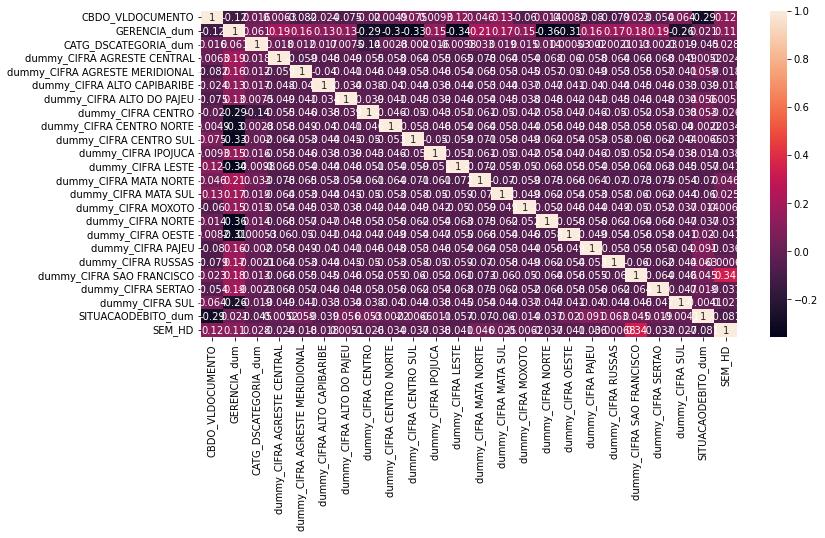

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df2.corr(), annot = True)

In [ ]:

df2['DT_CORTE'] = pd.to_numeric(df2['DT_CORTE'])
df2.info()

KeyError: ignored

In [ ]:

df = df2.reset_index()
df.fillna(value = 0,  inplace = True)
df

,index,CBDO_VLDOCUMENTO,GERENCIA_dum,CATG_DSCATEGORIA_dum,dummy_CIFRA AGRESTE CENTRAL,dummy_CIFRA AGRESTE MERIDIONAL,dummy_CIFRA ALTO CAPIBARIBE,dummy_CIFRA ALTO DO PAJEU,dummy_CIFRA CENTRO,dummy_CIFRA CENTRO NORTE,...,dummy_CIFRA MOXOTO,dummy_CIFRA NORTE,dummy_CIFRA OESTE,dummy_CIFRA PAJEU,dummy_CIFRA RUSSAS,dummy_CIFRA SAO FRANCISCO,dummy_CIFRA SERTAO,dummy_CIFRA SUL,SITUACAODEBITO_dum,SEM_HD
0,0,4164.97,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,3,3020.19,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,3102.98,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,16,6300.02,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,3221.25,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60823,156224,161.72,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
60824,156226,512.50,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
60825,156229,315.44,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
60826,156230,183.61,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df2.loc[df2['SITUACAODEBITO_dum']==0].count()

CBDO_VLDOCUMENTO                  36873
GERENCIA_dum                      36873
CATG_DSCATEGORIA_dum              36873
dummy_CIFRA AGRESTE CENTRAL       36873
dummy_CIFRA AGRESTE MERIDIONAL    36873
dummy_CIFRA ALTO CAPIBARIBE       36873
dummy_CIFRA ALTO DO PAJEU         36873
dummy_CIFRA CENTRO                36873
dummy_CIFRA CENTRO NORTE          36873
dummy_CIFRA CENTRO SUL            36873
dummy_CIFRA IPOJUCA               36873
dummy_CIFRA LESTE                 36873
dummy_CIFRA MATA NORTE            36873
dummy_CIFRA MATA SUL              36873
dummy_CIFRA MOXOTO                36873
dummy_CIFRA NORTE                 36873
dummy_CIFRA OESTE                 36873
dummy_CIFRA PAJEU                 36873
dummy_CIFRA RUSSAS                36873
dummy_CIFRA SAO FRANCISCO         36873
dummy_CIFRA SERTAO                36873
dummy_CIFRA SUL                   36873
SITUACAODEBITO_dum                36873
SEM_HD                            36873
dtype: int64

In [ ]:
sc = StandardScaler()
z = df.loc[:,['CBDO_VLDOCUMENTO','GERENCIA_dum', 'CATG_DSCATEGORIA_dum']]
z = sc.fit_transform(z)
z = pd.DataFrame(z , columns =  ['CBDO_VLDOCUMENTO','GERENCIA_dum', 'CATG_DSCATEGORIA_dum'])
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60828 entries, 0 to 60827
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CBDO_VLDOCUMENTO      60828 non-null  float64
 1   GERENCIA_dum          60828 non-null  float64
 2   CATG_DSCATEGORIA_dum  60828 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


In [ ]:
x = df.loc[:,['GERENCIA_dum', 'CATG_DSCATEGORIA_dum','dummy_CIFRA AGRESTE CENTRAL','dummy_CIFRA AGRESTE MERIDIONAL','dummy_CIFRA ALTO CAPIBARIBE','dummy_CIFRA ALTO DO PAJEU','dummy_CIFRA CENTRO','dummy_CIFRA CENTRO NORTE','dummy_CIFRA CENTRO SUL','dummy_CIFRA IPOJUCA','dummy_CIFRA LESTE','dummy_CIFRA MATA NORTE','dummy_CIFRA MATA SUL','dummy_CIFRA MOXOTO','dummy_CIFRA NORTE','dummy_CIFRA OESTE','dummy_CIFRA PAJEU','dummy_CIFRA RUSSAS','dummy_CIFRA SAO FRANCISCO','dummy_CIFRA SERTAO','dummy_CIFRA SUL','SEM_HD']]
x['CBDO_VLDOCUMENTO_PADRONIZADO'] = z  ['CBDO_VLDOCUMENTO']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60828 entries, 0 to 60827
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GERENCIA_dum                    60828 non-null  uint8  
 1   CATG_DSCATEGORIA_dum            60828 non-null  uint8  
 2   dummy_CIFRA AGRESTE CENTRAL     60828 non-null  uint8  
 3   dummy_CIFRA AGRESTE MERIDIONAL  60828 non-null  uint8  
 4   dummy_CIFRA ALTO CAPIBARIBE     60828 non-null  uint8  
 5   dummy_CIFRA ALTO DO PAJEU       60828 non-null  uint8  
 6   dummy_CIFRA CENTRO              60828 non-null  uint8  
 7   dummy_CIFRA CENTRO NORTE        60828 non-null  uint8  
 8   dummy_CIFRA CENTRO SUL          60828 non-null  uint8  
 9   dummy_CIFRA IPOJUCA             60828 non-null  uint8  
 10  dummy_CIFRA LESTE               60828 non-null  uint8  
 11  dummy_CIFRA MATA NORTE          60828 non-null  uint8  
 12  dummy_CIFRA MATA SUL            

In [ ]:
y = df['SITUACAODEBITO_dum']
np.unique(y, return_counts = True)


(array([0, 1], dtype=uint8), array([36873, 23955]))

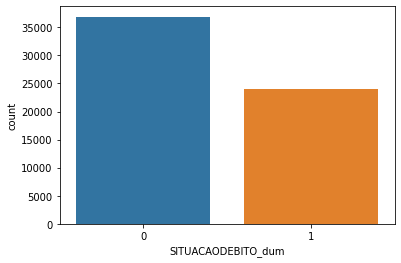

In [ ]:
sns.countplot(x = y)
# 0 pendente e 1 pago 

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
X_train


,GERENCIA_dum,CATG_DSCATEGORIA_dum,dummy_CIFRA AGRESTE CENTRAL,dummy_CIFRA AGRESTE MERIDIONAL,dummy_CIFRA ALTO CAPIBARIBE,dummy_CIFRA ALTO DO PAJEU,dummy_CIFRA CENTRO,dummy_CIFRA CENTRO NORTE,dummy_CIFRA CENTRO SUL,dummy_CIFRA IPOJUCA,...,dummy_CIFRA MOXOTO,dummy_CIFRA NORTE,dummy_CIFRA OESTE,dummy_CIFRA PAJEU,dummy_CIFRA RUSSAS,dummy_CIFRA SAO FRANCISCO,dummy_CIFRA SERTAO,dummy_CIFRA SUL,SEM_HD,CBDO_VLDOCUMENTO_PADRONIZADO
5661,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-0.428384
3309,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.332289
15420,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.417700
36722,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.498440
34619,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.381707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.424719
38158,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.348583
860,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.419633
15795,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.657997


In [ ]:
params = [{
              "penalty": ["l1","l2"],
               "C":[0.1,0.3,0.5,0.7,0.9,1,10,100]
    
    }]

logitic = LogisticRegression(C=100 ,penalty = 'l1', solver = 'liblinear')
#grid_search = GridSearchCV(ins, params, cv = 10)
#grid_search.fit(X_train,y_train)
#grid_search.best_params_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
fitting = tree.fit(X_train,y_train)
prev_sv = tree.predict(X_test)
print(classification_report(y_test, prev_sv))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69     11027
           1       0.52      0.49      0.50      7222

    accuracy                           0.62     18249
   macro avg       0.60      0.60      0.60     18249
weighted avg       0.61      0.62      0.62     18249



In [ ]:
from sklearn.svm  import SVC
clf = SVC()
fitting = clf.fit(X_train,y_train)
prev_svc = clf.predict(X_test)
print(classification_report(y_test, prev_svc))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72     11027
           1       0.57      0.51      0.54      7222

    accuracy                           0.65     18249
   macro avg       0.64      0.63      0.63     18249
weighted avg       0.65      0.65      0.65     18249



In [ ]:
# SVC
print(f'Acurácia:{accuracy_score(y_test,prev_svc)}')
print(f'Recall:{recall_score(y_test,prev_svc)}')
print(f'Precision:{precision_score(y_test,prev_svc)}')

Acurácia:0.6545564140500849
Recall:0.5112157297147605
Precision:0.5709866996597588


In [ ]:
#árvore de decisão
print(f'Acurácia:{accuracy_score(y_test,prev_sv)}')
print(f'Recall:{recall_score(y_test,prev_sv)}')
print(f'Precision:{precision_score(y_test,prev_sv)}')

Acurácia:0.6186640363855553
Recall:0.485738022708391
Precision:0.5194728268917518


In [ ]:
from sklearn.svm  import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train,y_train)




clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

KeyboardInterrupt: ignored

In [ ]:
logitic.fit(X_train,y_train)
pred = logitic.predict(X_test)
pred[:10]
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73     11027
           1       0.59      0.51      0.55      7222

    accuracy                           0.66     18249
   macro avg       0.65      0.64      0.64     18249
weighted avg       0.66      0.66      0.66     18249



In [ ]:
y_test[:10]

45796    0
20418    0
4678     1
19819    0
53207    0
45317    1
37771    0
18049    0
34982    0
44536    0
Name: SITUACAODEBITO_dum, dtype: uint8

In [ ]:
#Regressão Logistica 
from sklearn.metrics import accuracy_score, recall_score, precision_score
acu = accuracy_score(y_test,pred)
print(f'Acurácia:{accuracy_score(y_test,pred)}')
print(f'Recall:{recall_score(y_test,pred)}')
print(f'Precision:{precision_score(y_test,pred)}')


ValueError: ignored

In [ ]:
# matriz de conf reglog
print(pd.crosstab(y_test, pred, rownames=['real'], colnames=['predito'], margins=True))

predito      0     1    All
real                       
0         8430  2597  11027
1         3542  3680   7222
All      11972  6277  18249


In [ ]:
### aplicando UNDERSAMPLING
from imblearn.under_sampling import NearMiss
nr = NearMiss()

In [ ]:
X, y = nr.fit_resample(x, y)

(array([0, 1], dtype=uint8), array([23955, 23955]))

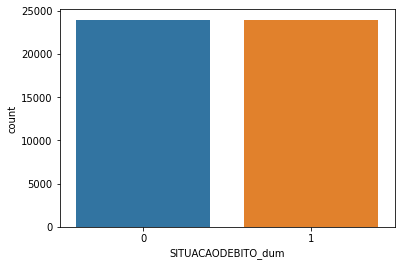

In [ ]:
sns.countplot(x = y)
np.unique(y, return_counts = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train


,GERENCIA_dum,CATG_DSCATEGORIA_dum,dummy_CIFRA AGRESTE CENTRAL,dummy_CIFRA AGRESTE MERIDIONAL,dummy_CIFRA ALTO CAPIBARIBE,dummy_CIFRA ALTO DO PAJEU,dummy_CIFRA CENTRO,dummy_CIFRA CENTRO NORTE,dummy_CIFRA CENTRO SUL,dummy_CIFRA IPOJUCA,...,dummy_CIFRA MOXOTO,dummy_CIFRA NORTE,dummy_CIFRA OESTE,dummy_CIFRA PAJEU,dummy_CIFRA RUSSAS,dummy_CIFRA SAO FRANCISCO,dummy_CIFRA SERTAO,dummy_CIFRA SUL,SEM_HD,CBDO_VLDOCUMENTO_PADRONIZADO
5068,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.417997
9753,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.396175
42381,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.386578
15226,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.378536
852,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.407895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-0.398999
44732,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,-0.423930
38158,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-0.400339
860,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-0.395000


In [ ]:
params = [{
              "penalty": ["l1","l2"],
               "C":[0.1,0.3,0.5,0.7,0.9,1,10,100]
    
    }]

logitic = LogisticRegression(C=100 ,penalty = 'l1', solver = 'liblinear')
#grid_search = GridSearchCV(ins, params, cv = 10)
#grid_search.fit(X_train,y_train)
#grid_search.best_params_

In [ ]:
logitic.fit(X_train,y_train)
pred1 = logitic.predict(X_test)
pred1[:10]
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      7171
           1       0.58      0.59      0.59      7202

    accuracy                           0.58     14373
   macro avg       0.58      0.58      0.58     14373
weighted avg       0.58      0.58      0.58     14373



In [ ]:
#Regressão Logistica 
from sklearn.metrics import accuracy_score, recall_score, precision_score
acu = accuracy_score(y_test,pred1)
print(f'Acurácia:{accuracy_score(y_test,pred1)}')
print(f'Recall:{recall_score(y_test,pred1)}')
print(f'Precision:{precision_score(y_test,pred1)}')

Acurácia:0.5844291379670215
Recall:0.5913635101360734
Precision:0.5843051173000412


In [ ]:
# matriz de conf reglog
print(pd.crosstab(y_test, pred1, rownames=['real'], colnames=['predito'], margins=True))

predito     0     1    All
real                      
0        4141  3030   7171
1        2943  4259   7202
All      7084  7289  14373


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
fitting = tree.fit(X_train,y_train)
prev_sv1 = tree.predict(X_test)
print(classification_report(y_test, prev_sv1))

              precision    recall  f1-score   support

           0       0.54      0.57      0.55      7171
           1       0.55      0.52      0.53      7202

    accuracy                           0.54     14373
   macro avg       0.54      0.54      0.54     14373
weighted avg       0.54      0.54      0.54     14373



In [ ]:
#árvore de decisão
print(f'Acurácia:{accuracy_score(y_test,prev_sv1)}')
print(f'Recall:{recall_score(y_test,prev_sv1)}')
print(f'Precision:{precision_score(y_test,prev_sv1)}')

Acurácia:0.5430320740276908
Recall:0.5151346848097751
Precision:0.5467138225758915


In [ ]:
from sklearn.svm  import SVC
clf = SVC()
fitting = clf.fit(X_train,y_train)
prev_svc1 = clf.predict(X_test)
print(classification_report(y_test, prev_svc1))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59      7171
           1       0.59      0.59      0.59      7202

    accuracy                           0.59     14373
   macro avg       0.59      0.59      0.59     14373
weighted avg       0.59      0.59      0.59     14373



In [ ]:
## colunas importantes 
# DT_EMISSAO, CAST_DSSITUACAOACAO ,CBDO_DTSITUACAOACAO, CDST_DSSITUACAODEBITO , CBDO_DTSITUACAODEBITO(datadaregularização),
# colunas categoricas 
# GREG_NMREGIONAL,CATG_DSCATEGORIA
# colunas de valor de débito tbm importante
# CBDO_VLDOCUMENTO, VL_DEBITO_ATUAL, QT_CONTAS_ATUAL

#retirar a classificação CANCELADO 
#retirar a categoria INDUSTRIAL 

In [ ]:
### aplicando OVERSAMPLING
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [ ]:
X, y = smt.fit_resample(x, y)

(array([0, 1], dtype=uint8), array([36873, 36873]))

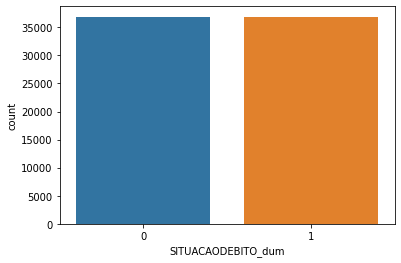

In [ ]:
sns.countplot(x = y)
np.unique(y, return_counts = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train

,GERENCIA_dum,CATG_DSCATEGORIA_dum,dummy_CIFRA AGRESTE CENTRAL,dummy_CIFRA AGRESTE MERIDIONAL,dummy_CIFRA ALTO CAPIBARIBE,dummy_CIFRA ALTO DO PAJEU,dummy_CIFRA CENTRO,dummy_CIFRA CENTRO NORTE,dummy_CIFRA CENTRO SUL,dummy_CIFRA IPOJUCA,...,dummy_CIFRA MOXOTO,dummy_CIFRA NORTE,dummy_CIFRA OESTE,dummy_CIFRA PAJEU,dummy_CIFRA RUSSAS,dummy_CIFRA SAO FRANCISCO,dummy_CIFRA SERTAO,dummy_CIFRA SUL,SEM_HD,CBDO_VLDOCUMENTO_PADRONIZADO
2007,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.386313
26698,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.411894
37164,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.291172
45042,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.412690
8870,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.220084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.418654
6265,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.413581
54886,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.300194
860,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.419633


In [ ]:
params = [{
              "penalty": ["l1","l2"],
               "C":[0.1,0.3,0.5,0.7,0.9,1,10,100]
    
    }]

logitic = LogisticRegression(C=100 ,penalty = 'l1', solver = 'liblinear')
#grid_search = GridSearchCV(ins, params, cv = 10)
#grid_search.fit(X_train,y_train)
#grid_search.best_params_

In [ ]:
logitic.fit(X_train,y_train)
pred1 = logitic.predict(X_test)
pred1[:10]
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.79      0.48      0.60     11105
           1       0.63      0.87      0.73     11019

    accuracy                           0.68     22124
   macro avg       0.71      0.68      0.66     22124
weighted avg       0.71      0.68      0.66     22124



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
#Regressão Logistica 
from sklearn.metrics import accuracy_score, recall_score, precision_score
acu = accuracy_score(y_test,pred1)
print(f'Acurácia:{accuracy_score(y_test,pred1)}')
print(f'Recall:{recall_score(y_test,pred1)}')
print(f'Precision:{precision_score(y_test,pred1)}')

Acurácia:0.6761435545109383
Recall:0.8710409293039296
Precision:0.6256029200886456


In [ ]:
# matriz de conf reglog
print(pd.crosstab(y_test, pred1, rownames=['real'], colnames=['predito'], margins=True))

predito     0      1    All
real                       
0        5361   5744  11105
1        1421   9598  11019
All      6782  15342  22124


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
fitting1 = tree.fit(X_train,y_train)
prev_sv1 = tree.predict(X_test)
print(classification_report(y_test, prev_sv1))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65     11105
           1       0.65      0.63      0.64     11019

    accuracy                           0.64     22124
   macro avg       0.64      0.64      0.64     22124
weighted avg       0.64      0.64      0.64     22124



In [ ]:
# matriz de conf arvdecs
print(pd.crosstab(y_test, prev_sv1, rownames=['real'], colnames=['predito'], margins=True))

predito      0      1    All
real                        
0         7270   3835  11105
1         4024   6995  11019
All      11294  10830  22124


In [ ]:
#árvore de decisão
print(f'Acurácia:{accuracy_score(y_test,prev_sv1)}')
print(f'Recall:{recall_score(y_test,prev_sv1)}')
print(f'Precision:{precision_score(y_test,prev_sv1)}')

Acurácia:0.6447749050804557
Recall:0.6348125964243579
Precision:0.6458910433979687


In [ ]:
from sklearn.svm  import SVC
clf = SVC()
fitting2 = clf.fit(X_train,y_train)
prev_svc1 = clf.predict(X_test)
print(classification_report(y_test, prev_svc1))
# 0 pendente e 1 pago 

              precision    recall  f1-score   support

           0       0.83      0.42      0.56     11105
           1       0.61      0.91      0.73     11019

    accuracy                           0.67     22124
   macro avg       0.72      0.67      0.65     22124
weighted avg       0.72      0.67      0.65     22124



In [ ]:
# matriz de conf forest
print(pd.crosstab(y_test, prev_fore, rownames=['real'], colnames=['predito'], margins=True))

predito     0      1    All
real                       
0        3933   7172  11105
1         547  10472  11019
All      4480  17644  22124


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=2, random_state=0)
fitting3 = forest.fit(X_train,y_train)
prev_fore = forest.predict(X_test)
print(classification_report(y_test, prev_fore))


              precision    recall  f1-score   support

           0       0.88      0.35      0.50     11105
           1       0.59      0.95      0.73     11019

    accuracy                           0.65     22124
   macro avg       0.74      0.65      0.62     22124
weighted avg       0.74      0.65      0.62     22124



In [ ]:
#salvar modelo
import pickle.dump(classificador, open('classificador', 'wb'))